In [0]:
import pandas as pd
import numpy as np
import math
import random
import scipy.stats
import matplotlib.pyplot as plt
import itertools

In [0]:
# loading data for 1.1 Part (a)
p1aurl = 'https://raw.githubusercontent.com/sarahyurick/datasets/master/p1a.csv'
p1a = pd.read_csv(p1aurl)


In [0]:
# preparing columns for 1.1 Part (a)
throwaway1 = p1a.iloc[:,0]
c1_1a = [0]
for i in throwaway1:
  c1_1a.append(i)

throwaway2 = p1a.iloc[:,1]
c2_1a = [0]
for i in throwaway2:
  c2_1a.append(i)

In [0]:
# functions to get column information
def get_col_counts(col,extra0=0,extra1=0):
  num0 = extra0
  num1 = extra1
  for i in col:
    if i == 0:
      num0 += 1
    if i == 1:
      num1 += 1
  return num0,num1

def find_entropy(col):
  count0, count1 = get_col_counts(col)

  percent0 = max(0.00000000001,count0/199)
  percent1 = max(0.00000000001,count1/199)
  h0 = -percent0 * math.log(percent0,2)
  h1 = -percent1 * math.log(percent1,2)
  return h0 + h1

def get_pairs(col1,col2,extra00=0, extra01=0, extra10=0, extra11=0):
  num00 = extra00
  num01 = extra01
  num10 = extra10
  num11 = extra11

  for v1, v2 in zip(col1, col2):
    if v1 == 0 and v2 == 0:
      num00 += 1
    if v1 == 0 and v2 == 1:
      num01 += 1
    if v1 == 1 and v2 == 0:
      num10 += 1
    if v1 == 1 and v2 == 1:
      num11 += 1
  
  return num00,num01,num10,num11
    
def find_joint_entropy_pass(col1, col2):
  count00,count01,count10,count11 = get_pairs(col1,col2)
      
  percent00 = max(0.00000000001,count00 / 199)
  percent01 = max(0.00000000001,count01 / 199)
  percent10 = max(0.00000000001,count10 / 199)
  percent11 = max(0.00000000001,count11 / 199)
  h00 = -percent00 * math.log(percent00,2)
  h01 = -percent01 * math.log(percent01,2)
  h10 = -percent10 * math.log(percent10,2)
  h11 = -percent11 * math.log(percent11,2)
  return h00 + h01 + h10 + h11

def find_joint_entropy(col1, col2):
  count00,count01,count10,count11 = get_pairs(col1,col2)
      
  percent00 = count00 / 199
  percent01 = count01 / 199
  percent10 = count10 / 199
  percent11 = count11 / 199
  if percent00 == 0:
    h00 = 0
  else:
    h00 = -percent00 * math.log(percent00,2)
  if percent01 == 0:
    h01 = 0
  else:
    h01 = -percent01 * math.log(percent01,2)
  if percent10 == 0:
    h10 = 0
  else:
    h10 = -percent10 * math.log(percent10,2)
  if percent11 == 0:
    h11 = 0
  else: 
    h11 = -percent11 * math.log(percent11,2)
  return h00 + h01 + h10 + h11

def get_mi(h1, h2, hjoint):
  return h1 + h2 - hjoint

In [0]:
# preparing values for monte carlo
def get_possible_values(col1,col2):
  possible_values = []
  for i in col1:
    possible_values.append(i)
  for i in col2: 
    possible_values.append(i)
  return possible_values

def monte_carlo_mi(col1,col2,N):
  possible_values = get_possible_values(col1,col2)
  pv_half = int(len(possible_values) / 2)
  mis = []
  
  for i in range(N):
    random.shuffle(possible_values)
    
    column1 = possible_values[:pv_half]
    column2 = possible_values[pv_half:]

    mi = get_mi(find_entropy(column1), find_entropy(column2), find_joint_entropy(column1,column2))
    mis.append(mi)
    
  return mis

def monte_carlo_jaccard(col1,col2,N):
  possible_values = get_possible_values(col1,col2)
  pv_half = int(len(possible_values) / 2)
  jaccards = []
  
  for i in range(N):
    random.shuffle(possible_values)
    
    column1 = possible_values[:pv_half]
    column2 = possible_values[pv_half:]
    
    j = calculate_jaccard(column1,column2)
    jaccards.append(j)
    
  return jaccards

In [7]:
mi_1a = get_mi(find_entropy(c1_1a), find_entropy(c2_1a), find_joint_entropy(c1_1a, c2_1a))
#0.8132632183446624
#0.4862767984814742
# 1.2525468552452912
# 0.04699316158084543
mi_1a

0.04699316194625758

In [8]:
N = 10000
mis = monte_carlo_mi(c1_1a, c2_1a,N)
print(mis)

[0.005618048014134347, 0.011508894426728755, 0.0049401722361059885, 0.000878952890487561, 0.0023414777946126897, 0.005050177504857478, 0.0004447021509910165, 0.00037111898862129955, 2.8636296320216914e-05, 0.00566826874416404, 0.00566826874416404, 0.0007789297332982947, 0.0022498629760321354, 0.01087026426410076, 0.017093776567630226, 9.431758181555061e-05, 0.00256404297995827, 0.002280153165571619, 0.001019225762041831, 0.005013417597663272, 0.005618048014134347, 0.0005689353517885909, 8.880655682985683e-05, 0.0006612734308726331, 0.0024353415917626187, 0.00037111898862129955, 1.2832765260650802e-05, 0.0022498629760321354, 0.0012657069311763358, 0.0024353415917626187, 0.005618048014134347, 7.826202281480121e-05, 0.0013664111280982105, 0.0012657069311763358, 0.006738142555442472, 0.005923940520369708, 0.0022498629760321354, 0.003491549689407014, 0.005050177504857478, 0.0049401722361059885, 0.005050177504857478, 0.001512729703492699, 0.0006612734308726331, 0.0004978350053086444, 7.82620

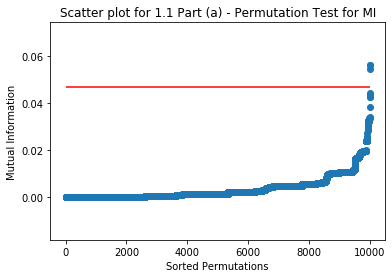

In [9]:
xaxis = []
mis.sort()
for i in range(N):
  xaxis.append(i)
plt.scatter(xaxis, mis)
plt.title('Scatter plot for 1.1 Part (a) - Permutation Test for MI')
plt.xlabel('Sorted Permutations')
plt.ylabel('Mutual Information')
plt.hlines(mi_1a, 0, N, colors='red')
plt.show()

In [10]:
c = 0
for i in mis: 
  if i > mi_1a:
    c += 1
pvalue_mi_1a = (c+1)/(N+1)
print(pvalue_mi_1a)

0.00039996000399960006


In [0]:
# getting info for jaccard
def calculate_jaccard(col1,col2,extra=0):
  num00,num01,num10,num11 = get_pairs(col1,col2,extra00=extra)
  return (num11 / (num01 + num10 + num11))

In [12]:
jaccard_index_1a = calculate_jaccard(c1_1a,c2_1a)
print(jaccard_index_1a)

0.0


In [13]:
jaccards_1a = monte_carlo_jaccard(c1_1a, c2_1a,N)
print(jaccards_1a)

[0.14516129032258066, 0.09230769230769231, 0.09230769230769231, 0.05970149253731343, 0.16393442622950818, 0.09230769230769231, 0.109375, 0.109375, 0.109375, 0.12698412698412698, 0.09230769230769231, 0.12698412698412698, 0.07575757575757576, 0.18333333333333332, 0.07575757575757576, 0.109375, 0.12698412698412698, 0.07575757575757576, 0.05970149253731343, 0.09230769230769231, 0.09230769230769231, 0.09230769230769231, 0.05970149253731343, 0.109375, 0.12698412698412698, 0.109375, 0.109375, 0.09230769230769231, 0.04411764705882353, 0.109375, 0.07575757575757576, 0.14516129032258066, 0.07575757575757576, 0.14516129032258066, 0.09230769230769231, 0.09230769230769231, 0.12698412698412698, 0.109375, 0.028985507246376812, 0.109375, 0.07575757575757576, 0.07575757575757576, 0.028985507246376812, 0.109375, 0.109375, 0.05970149253731343, 0.05970149253731343, 0.04411764705882353, 0.12698412698412698, 0.014285714285714285, 0.07575757575757576, 0.04411764705882353, 0.04411764705882353, 0.0757575757575

In [14]:
c = 0
for i in jaccards_1a: 
  if i < jaccard_index_1a:
    c += 1
pvalue_j_1a = (c+1)/(10000+1)
print(pvalue_j_1a)

9.999000099990002e-05


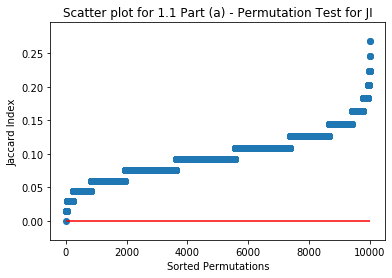

In [15]:
xaxis = []
jaccards_1a.sort()
for i in range(N):
  xaxis.append(i)
plt.scatter(xaxis, jaccards_1a)
plt.title('Scatter plot for 1.1 Part (a) - Permutation Test for JI')
plt.xlabel('Sorted Permutations')
plt.ylabel('Jaccard Index')
plt.hlines(jaccard_index_1a, 0, N, colors='red')
plt.show()

In [0]:
def calculate_chi(col1,col2,ddof=1):
  q = ddof

  num00,num01,num10,num11 = get_pairs(col1, col2)
  obs_freq = [num00, num01, num10, num11]

  num0_1,num1_1 = get_col_counts(col1)
  num0_2,num1_2 = get_col_counts(col2)
  e00 = (num0_1 * num0_2) / 199
  e01 = (num0_1 * num1_2) / 199
  e10 = (num1_1 * num0_2) / 199
  e11 = (num1_1 * num1_2) / 199
  exp_freq = [e00, e01, e10, e11]

  chi_square_result = scipy.stats.chisquare(f_obs=obs_freq, f_exp=exp_freq, ddof=q)
  return chi_square_result

In [17]:
chi_square_1a = calculate_chi(c1_1a, c2_1a)
print(chi_square_1a)

Power_divergenceResult(statistic=7.87836513083478, pvalue=0.01946411888810083)


In [0]:
p1burl = 'https://raw.githubusercontent.com/sarahyurick/datasets/master/p1b.csv'
p1b = pd.read_csv(p1burl)

In [0]:
throwaway = p1b.iloc[:,0]
c1_1b = [0]
for i in throwaway:
  c1_1b.append(i)
h1 = find_entropy(c1_1b)

throwaway = p1b.iloc[:,1]
c2_1b = [1]
for i in throwaway:
  c2_1b.append(i)
h2 = find_entropy(c2_1b)

throwaway = p1b.iloc[:,2]
c3_1b = [1]
for i in throwaway:
  c3_1b.append(i)
h3 = find_entropy(c3_1b)

throwaway = p1b.iloc[:,3]
c4_1b = [0]
for i in throwaway:
  c4_1b.append(i)
h4 = find_entropy(c4_1b)

throwaway = p1b.iloc[:,4]
c5_1b = [1]
for i in throwaway:
  c5_1b.append(i)
h5 = find_entropy(c5_1b)

throwaway = p1b.iloc[:,5]
c6_1b = [0]
for i in throwaway:
  c6_1b.append(i)
h6 = find_entropy(c6_1b)

throwaway = p1b.iloc[:,6]
c7_1b = [0]
for i in throwaway:
  c7_1b.append(i)
h7 = find_entropy(c7_1b)

throwaway = p1b.iloc[:,7]
c8_1b = [0]
for i in throwaway:
  c8_1b.append(i)
h8 = find_entropy(c8_1b)

throwaway = p1b.iloc[:,8]
c9_1b = [1]
for i in throwaway:
  c9_1b.append(i)
h9 = find_entropy(c9_1b)

throwaway = p1b.iloc[:,9]
c10_1b = [0]
for i in throwaway:
  c10_1b.append(i)
h10 = find_entropy(c10_1b)

throwaway = p1b.iloc[:,10]
c11_1b = [0]
for i in throwaway:
  c11_1b.append(i)
h11 = find_entropy(c11_1b)

throwaway = p1b.iloc[:,11]
c12_1b = [0]
for i in throwaway:
  c12_1b.append(i)
h12 = find_entropy(c12_1b)

throwaway = p1b.iloc[:,12]
c13_1b = [1]
for i in throwaway:
  c13_1b.append(i)
h13 = find_entropy(c13_1b)

throwaway = p1b.iloc[:,13]
c14_1b = [0]
for i in throwaway:
  c14_1b.append(i)
h14 = find_entropy(c14_1b)

throwaway = p1b.iloc[:,14]
c15_1b = [0]
for i in throwaway:
  c15_1b.append(i)
h15 = find_entropy(c15_1b)

In [20]:
p1b_entropies = [h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12,h13,h14,h15]
p1b_columns = [c1_1b,c2_1b,c3_1b,c4_1b,c5_1b,c6_1b,c7_1b,c8_1b,c9_1b,c10_1b,c11_1b,c12_1b,c13_1b,c14_1b,c15_1b]
joint_entropies_1b = []
mi_list_1b = []

for i in range(15):
  joint = 0
  firsth = p1b_columns[i]
  for j in range(i+1, 15):
    comparingh = p1b_columns[j]
    joint = find_joint_entropy(firsth,comparingh)
    joint_entropies_1b.append(joint)
    currentmi = get_mi(p1b_entropies[i],p1b_entropies[j],joint)
    mi_list_1b.append(currentmi)

print(mi_list_1b)
# print(len(mi_list_1b))

[0.05409338305556077, 0.3770318235987944, 0.7098907780024963, 0.05674106401270551, 0.19129241546358755, 0.7370862500524509, 0.557383937289774, 0.43424968973657685, 0.48296975378948526, 0.22935201201220545, 0.04579941517381081, 0.3267324856681073, 0.062082450314131066, 0.03424575014871767, 0.09337832441352711, 0.04939177283768137, 0.3144167099635393, 0.025270185701971926, 0.0505542179467362, 0.057713053401271086, 0.0994672724237784, 0.020296990254751845, 0.0025728486504783543, 0.020423313210382932, 0.006684521061020243, 0.0007126239491010988, 0.010000113980911163, 0.3911342345441964, 0.06668775169876273, 0.22326508724385263, 0.3706904506852844, 0.25942295711842833, 0.6864108555690258, 0.2817670664617635, 0.18733286204449207, 0.1310016470404889, 0.1812118079560172, 0.05304215397607526, 0.006244948068931722, 0.051806509648990806, 0.17155462000403365, 0.7086392309022498, 0.5568226436855492, 0.5006975393610331, 0.47846498237463764, 0.2186097336237287, 0.052524600063066806, 0.322355654094840

In [21]:
N = 1000
pvalues_mi_1b = []

for i in range(15):
  print("Working with Column", i+1, "pairs")
  firstcol = p1b_columns[i]
  firsth = p1b_entropies[i]
  for j in range(i+1, 15):
    secondcol = p1b_columns[j]
    secondh = p1b_entropies[j]
    # getting those mis
    joint = find_joint_entropy(firstcol,secondcol)
    getmi = get_mi(firsth,secondh,joint)
    
    # permutation test
    current_milist = monte_carlo_mi(firstcol,secondcol,N)
    
    # pvalues
    c = 0
    for k in current_milist:
      if k > getmi:
        c += 1
    pvalue = (c+1)/(N+1)
    pvalues_mi_1b.append(pvalue)

Working with Column 1 pairs
Working with Column 2 pairs
Working with Column 3 pairs
Working with Column 4 pairs
Working with Column 5 pairs
Working with Column 6 pairs
Working with Column 7 pairs
Working with Column 8 pairs
Working with Column 9 pairs
Working with Column 10 pairs
Working with Column 11 pairs
Working with Column 12 pairs
Working with Column 13 pairs
Working with Column 14 pairs
Working with Column 15 pairs


In [22]:
print(pvalues_mi_1b)

[0.001998001998001998, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.003996003996003996, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.011988011988011988, 0.001998001998001998, 0.000999000999000999, 0.000999000999000999, 0.01098901098901099, 0.44755244755244755, 0.022977022977022976, 0.16283716283716285, 0.6953046953046953, 0.07792207792207792, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.001998001998001998, 0.22277722277722278, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.00099900099900

In [23]:
indices = []
for i in range(105):
  indices.append(int(i))
mips_and_indices = pd.DataFrame({'mips' : pvalues_mi_1b, 'indices' : indices})
mips_and_indices = mips_and_indices.sort_values(by=['mips'])
print(mips_and_indices)

         mips  indices
52   0.000999       52
86   0.000999       86
51   0.000999       51
50   0.000999       50
87   0.000999       87
..        ...      ...
55   0.594406       55
57   0.597403       57
25   0.695305       25
100  0.856144      100
104  0.953047      104

[105 rows x 2 columns]


In [24]:
alpha = 0.05

for i in range(105):
  pj = mips_and_indices.iloc[i,0]
  rank = i + 1
  if pj <= (rank/105)*alpha:
    threshold = i

# threshold is the last time this is true
print(threshold)
print(mips_and_indices.iloc[threshold], mips_and_indices.iloc[threshold+1])

90
mips        0.022977
indices    23.000000
Name: 23, dtype: float64 mips        0.058941
indices    59.000000
Name: 59, dtype: float64


In [46]:
significant_mi_indices = []
for i in range(threshold):
  significant_mi_indices.append(mips_and_indices.iloc[i,1])
print(len(significant_mi_indices))
print(significant_mi_indices)

90
[52, 86, 51, 50, 87, 48, 47, 53, 46, 44, 43, 42, 41, 40, 39, 45, 85, 84, 81, 77, 72, 71, 70, 69, 78, 67, 66, 65, 64, 63, 62, 61, 60, 79, 88, 74, 90, 35, 15, 14, 102, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 16, 36, 75, 98, 34, 33, 32, 31, 30, 29, 28, 27, 91, 92, 93, 95, 96, 20, 19, 94, 80, 99, 82, 0, 73, 18, 76, 37, 49, 97, 13, 103, 21, 17, 68, 54, 101]


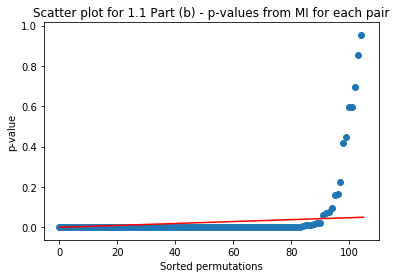

In [25]:
xaxis = []
for i in range(105):
  xaxis.append(i)
pvalues_mi_1b.sort()
plt.scatter(xaxis, pvalues_mi_1b)
plt.title('Scatter plot for 1.1 Part (b) - p-values from MI for each pair')
plt.xlabel('Sorted permutations')
plt.ylabel('p-value')
slope = alpha/105
x_0 = 0
y_0 = 0
x_1 = 105
y_1 = slope * (x_1 - x_0) + y_0
plt.plot([x_0, x_1], [y_0, y_1], c='r')
plt.show()

In [26]:
jaccard_list_1b = []

for i in range(15):
  firstj = p1b_columns[i]
  for j in range(i+1, 15):
    comparingj = p1b_columns[j]
    currentjaccard = calculate_jaccard(firstj,comparingj)
    jaccard_list_1b.append(currentjaccard)

print(jaccard_list_1b)

[0.0, 0.6410256410256411, 0.9259259259259259, 0.0, 0.0078125, 0.9444444444444444, 0.819672131147541, 0.6891891891891891, 0.7619047619047619, 0.5052631578947369, 0.20967741935483872, 0.5652173913043478, 0.05357142857142857, 0.034482758620689655, 0.24675324675324675, 0.0, 0.7307692307692307, 0.031914893617021274, 0.0, 0.0, 0.25675675675675674, 0.025974025974025976, 0.07766990291262135, 0.16216216216216217, 0.06666666666666667, 0.10256410256410256, 0.13725490196078433, 0.631578947368421, 0.22784810126582278, 0.027586206896551724, 0.6233766233766234, 0.5595238095238095, 0.8831168831168831, 0.5783132530120482, 0.5377358490566038, 0.26666666666666666, 0.5327102803738317, 0.09523809523809523, 0.1, 0.0, 0.008064516129032258, 0.9423076923076923, 0.8135593220338984, 0.704225352112676, 0.7540983606557377, 0.4787234042553192, 0.22413793103448276, 0.5384615384615384, 0.03636363636363636, 0.023809523809523808, 0.010309278350515464, 0.0, 0.012658227848101266, 0.25333333333333335, 0.02564102564102564,

In [27]:
N = 1000
pvalues_j_1b = []

for i in range(15):
  print("Working with Column", i+1, "pairs")
  firstcol = p1b_columns[i]
  for j in range(i+1, 15):
    secondcol = p1b_columns[j]
    # getting those jaccards
    getjaccard = calculate_jaccard(firstcol,secondcol)
    
    # permutation test
    current_jaccardlist = monte_carlo_jaccard(firstcol,secondcol,N)
    
    # pvalues
    c = 0
    for k in current_jaccardlist:
      if k < getjaccard:
        c += 1
    j_pvalue = (c+1)/(N+1)
    pvalues_j_1b.append(j_pvalue)

Working with Column 1 pairs
Working with Column 2 pairs
Working with Column 3 pairs
Working with Column 4 pairs
Working with Column 5 pairs
Working with Column 6 pairs
Working with Column 7 pairs
Working with Column 8 pairs
Working with Column 9 pairs
Working with Column 10 pairs
Working with Column 11 pairs
Working with Column 12 pairs
Working with Column 13 pairs
Working with Column 14 pairs
Working with Column 15 pairs


In [28]:
print(pvalues_j_1b)

[0.000999000999000999, 1.0, 1.0, 0.000999000999000999, 0.000999000999000999, 1.0, 1.0, 1.0, 1.0, 1.0, 0.993006993006993, 1.0, 0.000999000999000999, 0.000999000999000999, 0.995004995004995, 0.000999000999000999, 1.0, 0.001998001998001998, 0.000999000999000999, 0.000999000999000999, 1.0, 0.000999000999000999, 0.000999000999000999, 0.987012987012987, 0.000999000999000999, 0.22677322677322678, 0.9120879120879121, 1.0, 0.988011988011988, 0.000999000999000999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.000999000999000999, 0.02097902097902098, 0.000999000999000999, 0.000999000999000999, 1.0, 1.0, 1.0, 1.0, 1.0, 0.996003996003996, 1.0, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.999000999000999, 0.001998001998001998, 0.001998001998001998, 0.98001998001998, 0.007992007992007992, 0.03696303696303696, 0.958041958041958, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.000999000999000999, 0.00099

In [29]:
indices = []
for i in range(105):
  indices.append(int(i))
jps_and_indices = pd.DataFrame({'jps' : pvalues_j_1b, 'indices' : indices})
jps_and_indices = jps_and_indices.sort_values(by=['jps', 'indices'])
print(jps_and_indices)

         jps  indices
0   0.000999        0
3   0.000999        3
4   0.000999        4
12  0.000999       12
13  0.000999       13
..       ...      ...
85  1.000000       85
87  1.000000       87
90  1.000000       90
92  1.000000       92
96  1.000000       96

[105 rows x 2 columns]


In [30]:
alpha = 0.05

for i in range(105):
  pj = jps_and_indices.iloc[i,0]
  rank = i + 1
  if pj <= (rank/105)*alpha:
    threshold_j = i

# threshold is the last time this is true
print(threshold_j)
print(jps_and_indices.iloc[threshold_j], jps_and_indices.iloc[threshold_j+1])

41
jps         0.018981
indices    89.000000
Name: 89, dtype: float64 jps         0.020979
indices    38.000000
Name: 38, dtype: float64


In [47]:
significant_j_indices = []
for i in range(threshold_j):
  significant_j_indices.append(jps_and_indices.iloc[i,1])
print(len(significant_j_indices))
print(significant_j_indices)

41
[0, 3, 4, 12, 13, 15, 18, 19, 21, 22, 24, 29, 37, 39, 40, 48, 49, 50, 51, 52, 60, 61, 62, 63, 64, 65, 66, 75, 76, 82, 88, 93, 97, 102, 17, 54, 55, 68, 94, 57, 83]


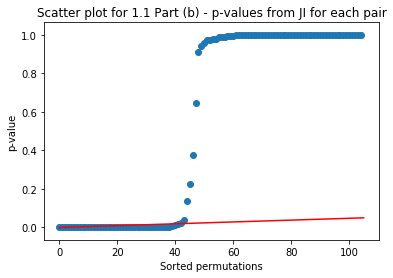

In [31]:
xaxis = []
for i in range(105):
  xaxis.append(i)
pvalues_j_1b.sort()
plt.scatter(xaxis, pvalues_j_1b)
plt.title('Scatter plot for 1.1 Part (b) - p-values from JI for each pair')
plt.xlabel('Sorted permutations')
plt.ylabel('p-value')
slope = alpha/105
x_0 = 0
y_0 = 0
x_1 = 105
y_1 = slope * (x_1 - x_0) + y_0
plt.plot([x_0, x_1], [y_0, y_1], c='r')
plt.show()

In [0]:
chi_squares = []
c_pvalues = []

for i in range(15):
  
  firstc = p1b_columns[i]
  for j in range(i+1, 15):
    comparingc = p1b_columns[j]
    chi_square, c_pvalue = calculate_chi(firstc,comparingc)
    
    chi_squares.append(chi_square)
    c_pvalues.append(c_pvalue)

In [33]:
chis_and_ps = [list(x) for x in zip(chi_squares,c_pvalues)]
print(chis_and_ps)

[[9.2114552893045, 0.00999442696687054], [97.40185818922372, 7.070583096479126e-22], [179.31270196370866, 1.155424310505407e-39], [9.68487460815047, 0.007887805623195571], [40.528021519109025, 1.5828944118700452e-09], [184.13475975975973, 1.0366805605385246e-40], [148.2840420714333, 6.317269243670472e-33], [111.52435129816254, 6.064497434735678e-25], [131.60533785491734, 2.64401546051586e-29], [58.474173270872214, 2.0067561716827015e-13], [14.354340564988892, 0.0007638261993074956], [78.02800666039163, 1.1387637574481753e-17], [15.050910493827157, 0.0005391831510464948], [7.858441067468991, 0.019658990102131874], [25.60963897333389, 2.7474990768447947e-06], [8.300155462025558, 0.015763191148419186], [135.40641316782077, 3.952491762245624e-30], [6.092996421293305, 0.0475250560776792], [8.523362345396244, 0.014098580326963905], [9.92862258295536, 0.006982758138490651], [27.688754158392836, 9.715461365934027e-07], [4.626381669213145, 0.09894503009657003], [0.6992566547733526, 0.7049500516

In [34]:
indices = []
for i in range(105):
  indices.append(int(i))
cps_and_indices = pd.DataFrame({'cps' : c_pvalues, 'indices' : indices})
cps_and_indices = cps_and_indices.sort_values(by=['cps', 'indices'])
print(cps_and_indices)

              cps  indices
5    1.036681e-40        5
41   1.419561e-40       41
2    1.155424e-39        2
32   5.959756e-36       32
69   7.398966e-34       69
..            ...      ...
57   8.228024e-01       57
55   8.482812e-01       55
25   9.047230e-01       25
104  9.862477e-01      104
100  9.926302e-01      100

[105 rows x 2 columns]


In [35]:
alpha = 0.05

for i in range(105):
  pj = cps_and_indices.iloc[i,0]
  rank = i + 1
  if pj <= (rank/105)*alpha:
    threshold_c = i

# threshold is the last time this is true
print(threshold_c)
print(cps_and_indices.iloc[threshold_c], cps_and_indices.iloc[threshold_c+1])

86
cps         0.036003
indices    56.000000
Name: 56, dtype: float64 cps          0.041989
indices    101.000000
Name: 101, dtype: float64


In [48]:
significant_chi_indices = []
for i in range(threshold_c):
  significant_chi_indices.append(cps_and_indices.iloc[i,1])
print(len(significant_chi_indices))
print(significant_chi_indices)

86
[5, 41, 2, 32, 69, 6, 42, 16, 71, 8, 44, 43, 70, 7, 96, 78, 27, 1, 30, 92, 77, 84, 90, 11, 74, 33, 47, 81, 31, 66, 62, 87, 9, 72, 45, 29, 79, 34, 36, 85, 4, 64, 63, 60, 86, 40, 35, 98, 95, 61, 67, 20, 14, 53, 102, 28, 48, 93, 46, 91, 88, 75, 12, 10, 37, 80, 50, 73, 99, 82, 65, 103, 19, 3, 76, 0, 51, 49, 94, 39, 97, 18, 15, 13, 52, 23]


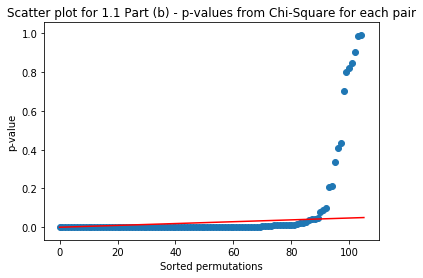

In [36]:
xaxis = []
for i in range(105):
  xaxis.append(i)
c_pvalues.sort()
plt.scatter(xaxis, c_pvalues)
plt.title('Scatter plot for 1.1 Part (b) - p-values from Chi-Square for each pair')
plt.xlabel('Sorted permutations')
plt.ylabel('p-value')
slope = alpha/105
x_0 = 0
y_0 = 0
x_1 = 105
y_1 = slope * (x_1 - x_0) + y_0
plt.plot([x_0, x_1], [y_0, y_1], c='r')
plt.show()

In [52]:
mi_sig_len = len(significant_mi_indices)
j_sig_len = len(significant_j_indices)
chi_sig_len = len(significant_chi_indices)
overlap_mj = []
overlap_jc = []
overlap_mc = []
overlap3 = []

for i in significant_mi_indices:
  for j in significant_j_indices:
    for k in significant_chi_indices:
      if i == j and j == k:
        overlap3.append(i)

for i in significant_mi_indices:
  for j in significant_j_indices:
    if i == j:
      overlap_mj.append(i)

for i in significant_j_indices:
  for j in significant_chi_indices:
    if i == j:
      overlap_jc.append(i)

for i in significant_mi_indices:
  for j in significant_chi_indices:
    if i == j:
      overlap_mc.append(i)

print("All 3", len(overlap3))
print(overlap3)
print("MI and JI", len(overlap_mj))
print(overlap_mj)
print("JI and Chi", len(overlap_jc))
print(overlap_jc)
print("MI and Chi", len(overlap_mc))
print(overlap_mc)

All 3 32
[52, 51, 50, 48, 40, 39, 66, 65, 64, 63, 62, 61, 60, 88, 15, 102, 12, 4, 3, 75, 29, 93, 19, 94, 82, 0, 18, 76, 37, 49, 97, 13]
MI and JI 36
[52, 51, 50, 48, 40, 39, 66, 65, 64, 63, 62, 61, 60, 88, 15, 102, 12, 4, 3, 75, 29, 93, 19, 94, 82, 0, 18, 76, 37, 49, 97, 13, 21, 17, 68, 54]
JI and Chi 32
[0, 3, 4, 12, 13, 15, 18, 19, 29, 37, 39, 40, 48, 49, 50, 51, 52, 60, 61, 62, 63, 64, 65, 66, 75, 76, 82, 88, 93, 97, 102, 94]
MI and Chi 85
[52, 86, 51, 50, 87, 48, 47, 53, 46, 44, 43, 42, 41, 40, 39, 45, 85, 84, 81, 77, 72, 71, 70, 69, 78, 67, 66, 65, 64, 63, 62, 61, 60, 79, 88, 74, 90, 35, 15, 14, 102, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 16, 36, 75, 98, 34, 33, 32, 31, 30, 29, 28, 27, 91, 92, 93, 95, 96, 20, 19, 94, 80, 99, 82, 0, 73, 18, 76, 37, 49, 97, 13, 103]


In [0]:
p2aurl = 'https://raw.githubusercontent.com/sarahyurick/datasets/master/p2a.csv'
p2a = pd.read_csv(p2aurl)

In [38]:
throwaway = p2a.iloc[:,0]
va1 = [-0.64901]
for i in throwaway:
  va1.append(i)

throwaway = p2a.iloc[:,1]
va2 = [2.8005]
for i in throwaway:
  va2.append(i)

ra, pa = scipy.stats.pearsonr(va1,va2)
print(ra, pa)

0.38087503578373016 1.0409455130019734e-83


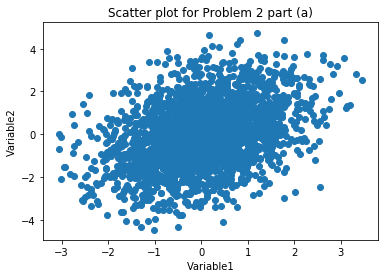

In [39]:
plt.scatter(va1, va2)
plt.title('Scatter plot for Problem 2 part (a)')
plt.xlabel('Variable1')
plt.ylabel('Variable2')
plt.show()

In [0]:
p2burl = 'https://raw.githubusercontent.com/sarahyurick/datasets/master/p2b.csv'
p2b = pd.read_csv(p2burl)

In [41]:
throwaway = p2b.iloc[:,0]
vb1 = [-0.343]
for i in throwaway:
  vb1.append(i)

throwaway = p2b.iloc[:,1]
vb2 = [-0.72006]
for i in throwaway:
  vb2.append(i)

rb, pb = scipy.stats.pearsonr(vb1,vb2)
print(rb, pb)

0.9312196333264214 3.737321008438946e-49


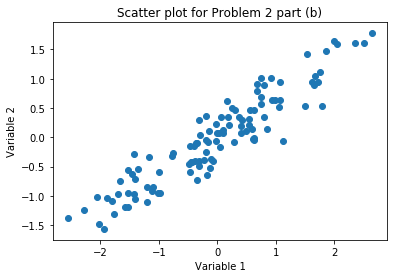

In [42]:
plt.scatter(vb1, vb2)
plt.title('Scatter plot for Problem 2 part (b)')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.show()

In [0]:
p2curl = 'https://raw.githubusercontent.com/sarahyurick/datasets/master/p2c.csv'
p2c = pd.read_csv(p2curl)

In [44]:
throwaway = p2c.iloc[:,0]
vc1 = [-0.343]
for i in throwaway:
  vc1.append(i)

throwaway = p2c.iloc[:,1]
vc2 = [0.2029]
for i in throwaway:
  vc2.append(i)

rc, pc = scipy.stats.pearsonr(vc1,vc2)
print(rc, pc)

0.04117899777683179 0.05919591660545298


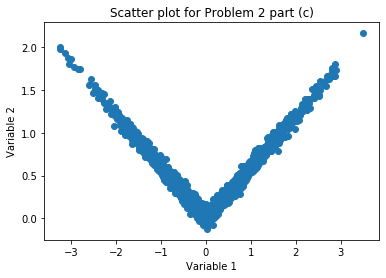

In [45]:
plt.scatter(vc1, vc2)
plt.title('Scatter plot for Problem 2 part (c)')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.show()